# Artificial Neural Network

An Artificial Neural Network (ANN) is a computational model inspired by the human brain, consisting of layers of interconnected nodes (neurons). It processes input data through weighted connections, adjusts these weights during training using algorithms like backpropagation, and learns to recognize patterns. ANNs typically include an input layer, one or more hidden layers, and an output layer. Each neuron applies an activation function to its input to introduce non-linearity. ANNs are widely used for tasks such as classification, regression, and pattern recognition in fields like image processing, natural language processing, and robotics due to their ability to model complex relationships.

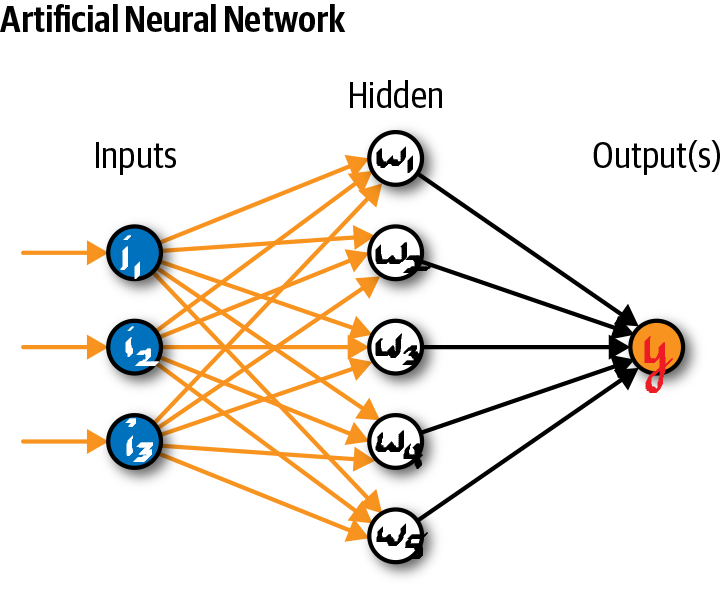

### 🧠 Simple Neural Network: 3 Inputs & 5 Hidden Neurons

#### 🔢 Inputs:
The input vector is:

$$
x_1,\ x_2,\ x_3
$$

---

#### 🧮 Weights:
Each input neuron connects to each of the 5 hidden neurons, so the weights are:

$$
w_{ij} \quad \text{where } i = 1, 2, 3 \text{ and } j = 1, 2, 3, 4, 5
$$

---

#### 🎯 Hidden Layer Pre-Activation:
For each hidden neuron \( j \), the pre-activation value is:

$$
z_j = \sum_{i=1}^{3} x_i \cdot w_{ij} + b_j
$$

---

#### ✅ Hidden Layer Output:
The activation output of each hidden neuron is:

$$
h_j = \sigma(z_j) = \sigma\left( \sum_{i=1}^{3} x_i \cdot w_{ij} + b_j \right) \quad \text{for } j = 1, 2, 3, 4, 5
$$

---

#### 🎯 Output Layer (Pre-Activation):
Let the output neuron have weights \( v_j \) for each hidden neuron and bias \( b_o \). The net input to the output neuron is:

$$
z_o = \sum_{j=1}^{5} h_j \cdot v_j + b_o
$$

---

#### ✅ Final Prediction:
The predicted output is:

$$
\hat{y} = \sigma(z_o) = \sigma\left( \sum_{j=1}^{5} h_j \cdot v_j + b_o \right)
$$


### 🧠 Backpropagation: Understanding Gradient Descent

Backpropagation is the process of computing gradients (partial derivatives) of the loss function with respect to each weight and bias in the network. This is done to update the weights using gradient descent.

---

#### 1. **Compute the Error at the Output Layer**:

First, compute the error at the output neuron. This is the difference between the predicted output \( \hat{y} \) and the true output \( y \):

$$
\delta_o = \frac{\partial L}{\partial \hat{y}} = \hat{y} - y
$$

Where:
- \( \hat{y} \) is the predicted output.
- \( y \) is the true value (target).
- \( \delta_o \) is the error term at the output layer.

---

#### 2. **Compute Gradients for Weights at Output Layer**:

Next, we compute the gradients of the loss function with respect to the weights at the output layer. If the weights connecting the hidden neurons to the output neuron are \( v_j \), the gradient of the loss with respect to each weight is:

$$
\frac{\partial L}{\partial v_j} = \delta_o \cdot h_j
$$

Where:
- \( h_j \) is the output of hidden neuron \( j \).

---

#### 3. **Compute the Error at the Hidden Layer**:

Now, compute the error term for the hidden layer. This error term is propagated backwards from the output layer using the weights \( v_j \). The error for hidden neuron \( h_j \) is computed as:

$$
\delta_j = \delta_o \cdot v_j \cdot \sigma'(z_j)
$$

Where:
- \( \delta_j \) is the error term for hidden neuron \( j \).
- \( \sigma'(z_j) \) is the derivative of the activation function \( \sigma \) with respect to the pre-activation \( z_j \).
- \( v_j \) is the weight connecting hidden neuron \( j \) to the output.

---

#### 4. **Compute Gradients for Weights at Hidden Layer**:

To update the weights from input to hidden neurons, we compute the gradient of the loss function with respect to each weight \( w_{ij} \). The gradient is given by:

$$
\frac{\partial L}{\partial w_{ij}} = \delta_j \cdot x_i
$$

Where:
- \( \delta_j \) is the error term for hidden neuron \( j \).
- \( x_i \) is the input value from the input layer.

---

#### 5. **Update Weights and Biases**:

Finally, the weights and biases are updated using **gradient descent**:

- For output layer weights \( v_j \):

$$
v_j \leftarrow v_j - \eta \cdot \frac{\partial L}{\partial v_j}
$$

- For input-to-hidden layer weights \( w_{ij} \):

$$
w_{ij} \leftarrow w_{ij} - \eta \cdot \frac{\partial L}{\partial w_{ij}}
$$

Where \( \eta \) is the **learning rate**, which determines the step size for the update.

---

### 🔄 Repeat the Process:

This process is repeated for multiple iterations (epochs) until the loss function converges to a minimum, meaning the network's weights are adjusted such that the model makes more accurate predictions.

---

Let me know if you'd like further elaboration or if you'd like to explore **backpropagation** for other types of models or loss functions!


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
import numpy as np

In [ ]:
np.unique(df["label"])

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Get unique labels and create mapping
unique_labels = np.unique(df["label"])
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# Step 2: Apply the mapping to encode the labels
df["label_encoded"] = df["label"].apply(lambda x: label_to_index[x])

# Optional: print the mapping
print("Label to index mapping:")
print(label_to_index)


Label to index mapping:
{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [ ]:
data=df

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [ ]:
df=df.drop("label",axis=1)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
x=df.drop("label_encoded",axis=1)
y=df["label_encoded"]

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

,label_encoded
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Optional: check the shapes
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (1760, 7)
x_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD # stocatic Gradient Descent
import numpy as np

# Define SGD optimizer with a learning rate
optimizer = SGD(learning_rate=0.01)

# 1. Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)), #input
    Dense(32, activation='relu'), #hidden layer
    Dense(len(np.unique(y_train)), activation='softmax') #output
])

# 2. Compile the model with SGD optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0988 - loss: 8.4501 - val_accuracy: 0.2045 - val_loss: 2.5644
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2812 - loss: 2.4479 - val_accuracy: 0.3750 - val_loss: 1.9744
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3900 - loss: 1.9473 - val_accuracy: 0.3949 - val_loss: 1.8464
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4000 - loss: 1.8162 - val_accuracy: 0.4318 - val_loss: 1.6440
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4573 - loss: 1.6382 - val_accuracy: 0.4574 - val_loss: 1.6816
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5248 - loss: 1.4867 - val_accuracy: 0.6222 - val_loss: 1.2266
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5388 - loss: 1.3930 - val_accuracy: 0.6364 - val_loss: 1.1208
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6176 - loss: 1.1884 - val_accuracy: 0.7131 - val_loss: 1.0453
Epo

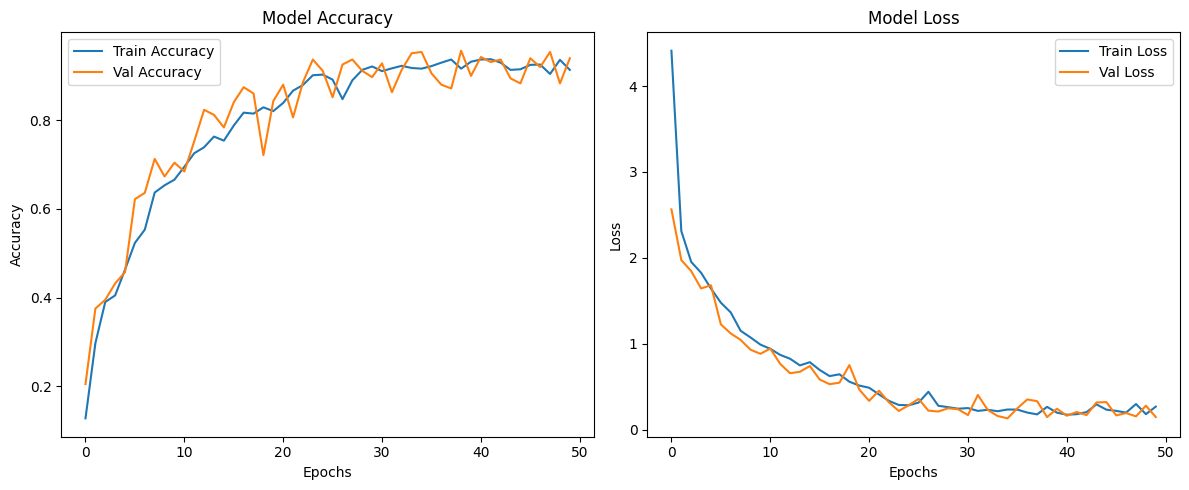

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Sample prediction

In [ ]:
sample_input = np.array([[90, 42, 43, 20.5, 82.0, 6.5, 200]]).reshape(1, -1)

In [ ]:
prediction = model.predict(sample_input)
predicted_class_index = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [ ]:
predicted_class_index

np.int64(20)

In [ ]:
label_map = {index: name for index, name in enumerate(np.unique(data['label']))}


In [ ]:
predicted_crop = label_map[predicted_class_index]
print("Predicted crop:", predicted_crop)


Predicted crop: rice
